In [1]:
import pandas as pd

data = pd.read_csv("listings_data.csv", index_col="id")

In [2]:
data.head()

,maakond,linn,linnaosa,pind,tube,magamistube,korrus,korruseid,ehitusaasta,seisukord,energiamärgis,hoone materjal,omandivorm,hind
id,,,,,,,,,,,,,,
3559669,harjumaa,harku vald,tiskre,85.5,4.0,3.0,2.0,2.0,2024.0,uus,a,NaN,korteriomand,282150.0
3699341,harjumaa,tallinn,põhja-tallinn,66.5,3.0,NaN,3.0,3.0,2025.0,uusarendus,c,NaN,korteriomand,449900.0
3624886,harjumaa,tallinn,kesklinn,79.6,4.0,3.0,4.0,4.0,2023.0,uus,a,NaN,korteriomand,362350.0
3497081,harjumaa,tallinn,kesklinn,68.2,4.0,3.0,2.0,4.0,2023.0,uus,a,NaN,korteriomand,322450.0
3694297,harjumaa,tallinn,nõmme,96.0,3.0,2.0,1.0,3.0,2007.0,heas korras,puudub,NaN,NaN,309000.0


In [3]:
data.shape

(11580, 14)

In [4]:
data = data.drop(columns=['hoone materjal'])

In [5]:
data.head()

,maakond,linn,linnaosa,pind,tube,magamistube,korrus,korruseid,ehitusaasta,seisukord,energiamärgis,omandivorm,hind
id,,,,,,,,,,,,,
3559669,harjumaa,harku vald,tiskre,85.5,4.0,3.0,2.0,2.0,2024.0,uus,a,korteriomand,282150.0
3699341,harjumaa,tallinn,põhja-tallinn,66.5,3.0,NaN,3.0,3.0,2025.0,uusarendus,c,korteriomand,449900.0
3624886,harjumaa,tallinn,kesklinn,79.6,4.0,3.0,4.0,4.0,2023.0,uus,a,korteriomand,362350.0
3497081,harjumaa,tallinn,kesklinn,68.2,4.0,3.0,2.0,4.0,2023.0,uus,a,korteriomand,322450.0
3694297,harjumaa,tallinn,nõmme,96.0,3.0,2.0,1.0,3.0,2007.0,heas korras,puudub,NaN,309000.0


In [6]:
data.describe()

,pind,tube,magamistube,korrus,korruseid,ehitusaasta,hind
count,11574.000000,11525.000000,8525.000000,11078.000000,11452.000000,10429.000000,1.152600e+04
mean,61.224866,2.593145,1.817595,3.020311,4.797241,1990.110461,1.718489e+05
std,40.067439,1.010156,0.872662,2.182361,2.879879,41.385937,1.522255e+05
min,1.000000,1.000000,1.000000,-2.000000,1.000000,198.000000,5.000000e+03
25%,43.600000,2.000000,1.000000,2.000000,3.000000,1971.000000,7.400000e+04
50%,56.300000,3.000000,2.000000,2.000000,4.000000,1988.000000,1.379000e+05
75%,71.500000,3.000000,2.000000,4.000000,5.000000,2023.000000,2.290000e+05
max,2803.000000,12.000000,23.000000,24.000000,55.000000,2027.000000,2.750000e+06


In [7]:
df = data[~data["linnaosa"].str.contains(r"\btuba\b|-", na=False)]

In [8]:
#Find rows, that have same features, but different id

# Specify columns to compare (exclude 'id' and 'hind')
comparison_columns = df.columns.difference(['id'])

# Find duplicate rows based on these columns
duplicates = df[df.duplicated(subset=comparison_columns, keep=False)]

# Display rows where duplicates occur
duplicates.sort_values('hind')

,maakond,linn,linnaosa,pind,tube,magamistube,korrus,korruseid,ehitusaasta,seisukord,energiamärgis,omandivorm,hind
id,,,,,,,,,,,,,
3702294,lääne-virumaa,tapa vald,tapa linn,38.2,2.0,NaN,2.0,5.0,NaN,NaN,puudub,korteriomand,19500.0
3705015,lääne-virumaa,tapa vald,tapa linn,38.2,2.0,NaN,2.0,5.0,NaN,NaN,puudub,korteriomand,19500.0
3695779,jõgevamaa,jõgeva vald,jõgeva linn,46.1,2.0,1.0,5.0,5.0,NaN,vajab san. remonti,d,korteriomand,24000.0
3704641,jõgevamaa,jõgeva vald,jõgeva linn,46.1,2.0,1.0,5.0,5.0,NaN,vajab san. remonti,d,korteriomand,24000.0
3705941,lääne-virumaa,tapa vald,tamsalu linn,76.3,4.0,3.0,5.0,5.0,1980.0,NaN,e,korteriomand,24500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3694408,harjumaa,tallinn,pirita,146.6,5.0,4.0,3.0,3.0,2023.0,NaN,c,korteriomand,850000.0
3632227,harjumaa,tallinn,kadriorg,159.2,5.0,3.0,3.0,3.0,2023.0,uus,a,korteriomand,1490000.0
3702007,harjumaa,tallinn,kadriorg,159.2,5.0,3.0,3.0,3.0,2023.0,uus,a,korteriomand,1490000.0


In [9]:
df = df.drop_duplicates(subset=comparison_columns, keep='first')
df.shape

(9120, 13)

In [10]:
# one-hot encode categorical variables
df['omandivorm'] = df['omandivorm'].fillna('korteriomand') #Most likely the case
categorical_columns = ["maakond", "linn", "linnaosa", "seisukord", "energiamärgis", "omandivorm"]
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [11]:
#Extracting the outliers

numeric_columns = ["pind", "tube", "magamistube", "korrus", "korruseid", "ehitusaasta"]
Q1 = df[numeric_columns].quantile(0.15)

Q3 = df[numeric_columns].quantile(0.85)

IQR = Q3 - Q1

outlier_filter = ~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | 
                   (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

df = df[outlier_filter]


df.shape

(8815, 614)

In [12]:
df = df.dropna(subset=['hind'])

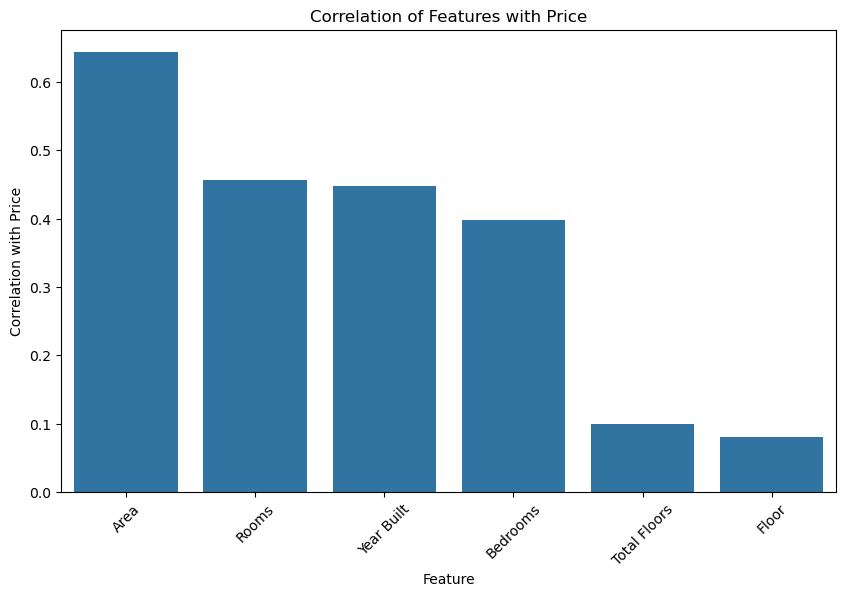

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of features in Estonian
features_estonian = ['pind', 'tube', 'magamistube', 'korrus', 'korruseid', 'ehitusaasta']

# Mapping of Estonian feature names to English feature names
feature_translation = {
    'pind': 'Area',
    'tube': 'Rooms',
    'magamistube': 'Bedrooms',
    'korrus': 'Floor',
    'korruseid': 'Total Floors',
    'ehitusaasta': 'Year Built',
    'hind' : 'Price'
}

# Translate the Estonian feature names to English
features_english = [feature_translation[feature] for feature in features_estonian]

# Calculate the correlation of each feature with 'hind' (price)
correlations = [df[feature].corr(df['hind']) for feature in features_estonian]

# Create a DataFrame for plotting
correlation_df = pd.DataFrame({
    'Feature': features_english,
    'Correlation with Price': correlations
})

# Sort the correlation values by absolute correlation value
correlation_df = correlation_df.sort_values(by='Correlation with Price', ascending=False)

# Plot the correlations as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Correlation with Price', data=correlation_df)
plt.title('Correlation of Features with Price')  
plt.xlabel('Feature')  
plt.ylabel('Correlation with Price')  
plt.xticks(rotation=45)  
plt.show()


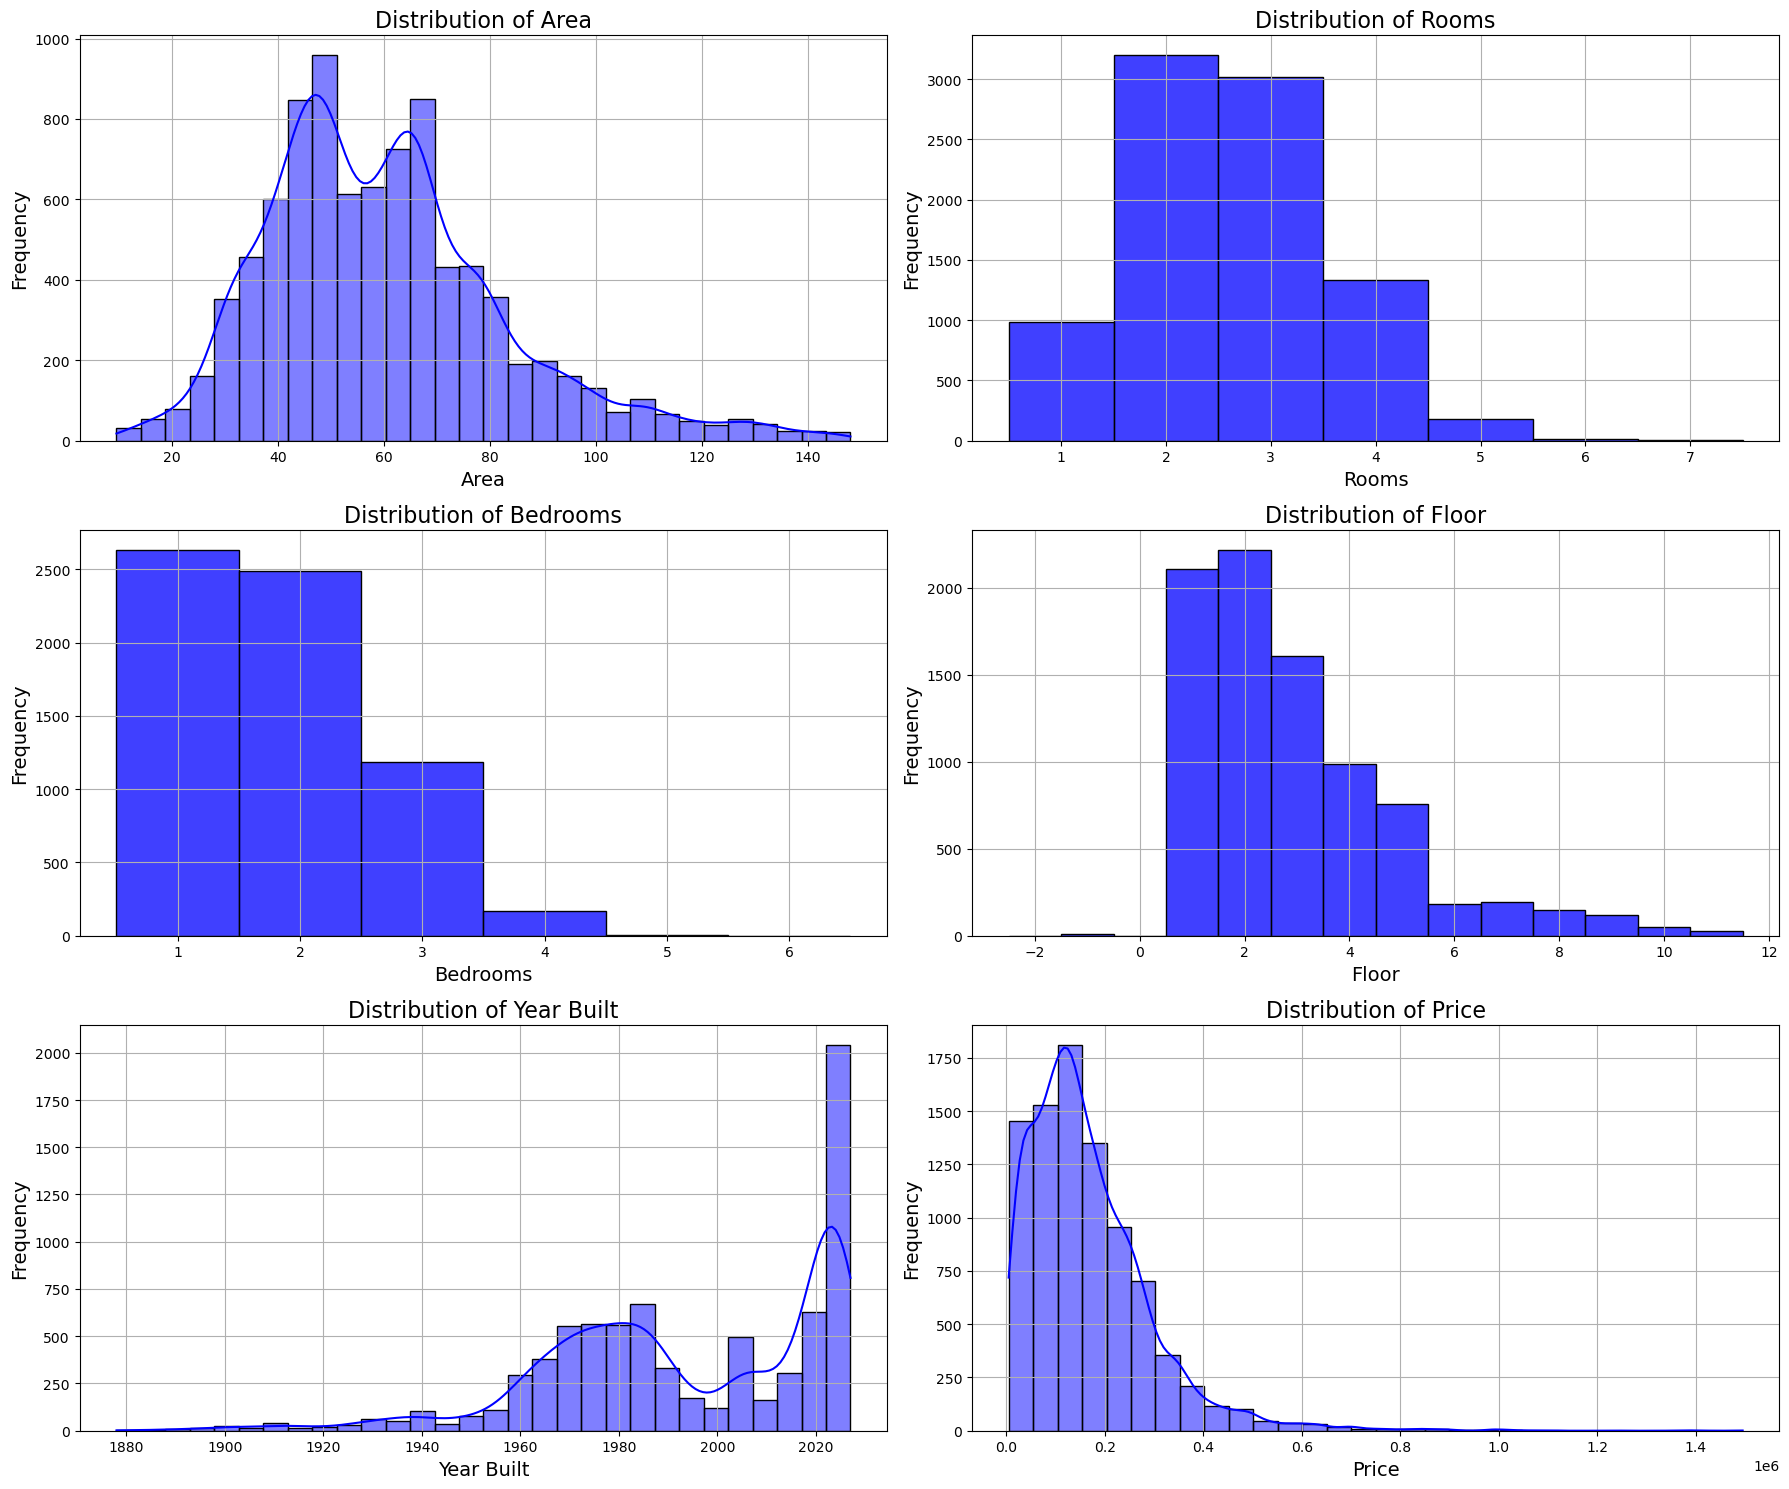

In [14]:
import numpy as np
# Define bins for discrete variables to avoid gaps
bins = {
    "tube": np.arange(df["tube"].min(), df["tube"].max() + 2) - 0.5,
    "magamistube": np.arange(df["magamistube"].min(), df["magamistube"].max() + 2) - 0.5,
    "korrus": np.arange(df["korrus"].min(), df["korrus"].max() + 2) - 0.5,
}

# List of features to plot
features = ["pind", "tube", "magamistube", "korrus", "ehitusaasta", "hind"]

# Set up the figure
plt.figure(figsize=(18, 15))  # Adjust figure size

# Loop through features and create a subplot for each
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)  # Create a 3x2 grid for subplots

    if feature in bins:  # If the feature is discrete, use defined bins
        sns.histplot(df[feature], kde=False, bins=bins[feature], color="blue", edgecolor="black")
    else:  # For continuous variables, default binning with KDE
        sns.histplot(df[feature], kde=True, bins=30, color="blue", edgecolor="black")

    # Use English feature names for titles and labels
    plt.title(f"Distribution of {feature_translation[feature]}", fontsize=16)
    plt.xlabel(feature_translation[feature], fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


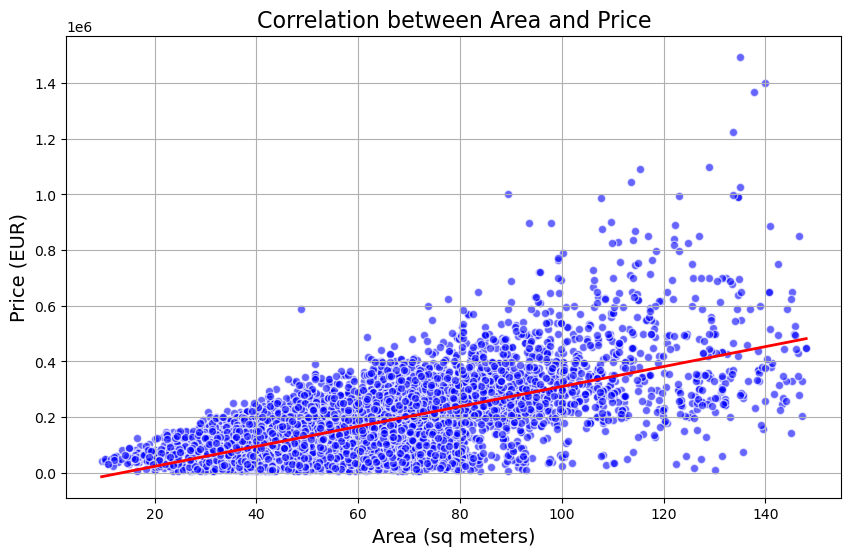

In [15]:
plt.figure(figsize=(10, 6))

# Create scatterplot with a regression line
sns.regplot(
    x=df["pind"], 
    y=df["hind"], 
    scatter_kws={"color": "blue", "alpha": 0.6, "edgecolors": "white"},  # Style for scatter points
    line_kws={"color": "red", "linewidth": 2},   # Style for regression line
    ci=None  # Removes confidence interval shading
)

# Add labels and title
plt.title("Correlation between Area and Price", fontsize=16)
plt.xlabel("Area (sq meters)", fontsize=14)
plt.ylabel("Price (EUR)", fontsize=14)

# Display the plot
plt.grid(True)
plt.show()

In [16]:
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


X = df.drop(columns=["hind"])
y = df["hind"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#model = RandomForestRegressor(n_estimators=300)
#model.fit(X_train, y_train)
model = joblib.load('good_model.pkl')  #Comment this line adn uncomment the two previous lines if you want to train a new model


In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


y_pred = model.predict(X_test)
r = (r2_score(y_test, y_pred))
r

0.954774367701722

In [18]:
df.columns

Index(['pind', 'tube', 'magamistube', 'korrus', 'korruseid', 'ehitusaasta',
       'hind', 'maakond_hiiumaa', 'maakond_ida-virumaa', 'maakond_järvamaa',
       ...
       'energiamärgis_f', 'energiamärgis_g', 'energiamärgis_h',
       'energiamärgis_puudub', 'omandivorm_hoonestusõigus',
       'omandivorm_kaasomand', 'omandivorm_kinnistu',
       'omandivorm_korteriomand', 'omandivorm_vallasasi',
       'omandivorm_üürileping'],
      dtype='object', length=614)

In [19]:
# Testing what our model predicts
#The following apartment had a apraisal report for 122000€ and was sold for 119500€.
#Our model pedicted 120468.99€

new_listing = {
    'tube': 2,
    'pind': 39.3,
    'korrus': 2,
    'korruseid': 4,
    'ehitusaasta': 1964,
    'linn' : 'tallinn',
    'linnaosa' : 'kristiine',
    'maakond' : 'harjumaa',
    'seisukord' : 'renoveeritud',
    'omandivorm' : 'korteriomand',
    'energiamärgis' : 'b'
}
new_listing_df = pd.DataFrame([new_listing])
new_listing_encoded = pd.get_dummies(new_listing_df)
new_listing_encoded = new_listing_encoded.reindex(columns=X_train.columns, fill_value=0)
predicted_price = model.predict(new_listing_encoded)

print(f"Predicted Price: {predicted_price[0]}")



Predicted Price: 120468.99333333333


In [20]:
# Save the trained model to a file
joblib.dump(model, 'good_model.pkl')


#loaded_model = joblib.load('good_model.pkl')

# Now you can use loaded_model to make predictions
#y_pred_loaded = loaded_model.predict(X_test)
#r = (r2_score(y_test, y_pred_loaded))
#r

['good_model.pkl']

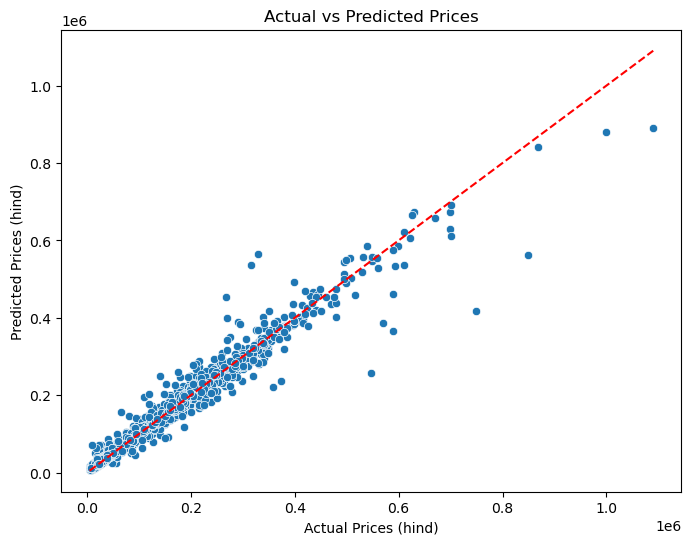

In [21]:
#Actual vs predicted prices scatterplot

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices (hind)')
plt.ylabel('Predicted Prices (hind)')

# Adding a line of perfect prediction (where actual = predicted)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()

In [22]:
# Combine actual and predicted prices into a dataframe
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
# Reset the index of `y_test` to ensure alignment with the predictions
results.index = y_test.index

# Sort the results dataframe by actual prices
results_sorted = results.sort_values(by='Actual')

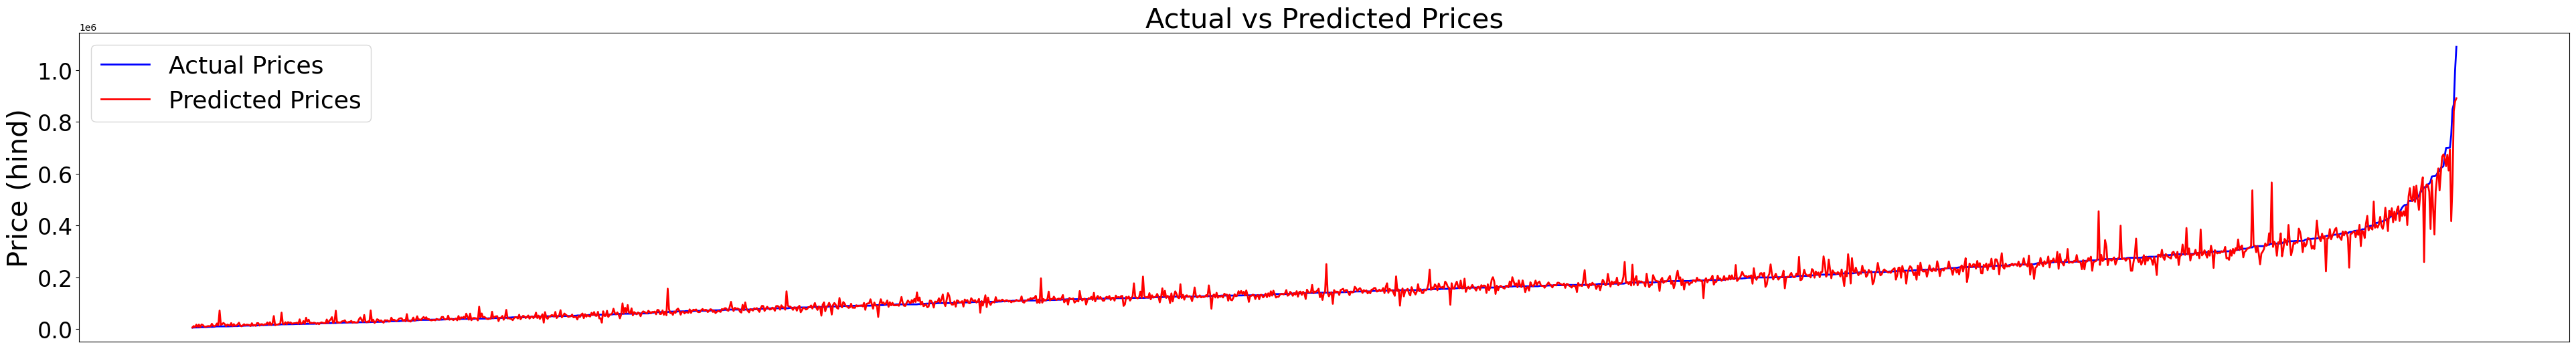

In [23]:
# Create a plot with a larger size
plt.figure(figsize=(48, 6))

# Plot the actual prices (sorted by actual prices)
plt.plot(results_sorted['Actual'].values, label='Actual Prices', color='blue', linewidth=2)

# Plot the predicted prices (aligned with actual prices after sorting)
plt.plot(results_sorted['Predicted'].values, label='Predicted Prices', color='red', linewidth=2)
plt.tick_params(axis='y', labelsize=24)
# Adding labels and title
plt.title('Actual vs Predicted Prices', fontsize=30)
plt.ylabel('Price (hind)', fontsize=30)

# Remove the x-axis labels (index values)
plt.xticks([])  # This removes the x-axis ticks

# Add a legend
plt.legend()
plt.legend(loc=0, fontsize=26)
# Show the plot
plt.show()

In [24]:
results_sorted['Price Difference'] = results_sorted['Predicted'] - results_sorted['Actual']

# Define a threshold for undervaluation (you can adjust this value)
threshold = 50000  # For example, if the predicted price is more than 50,000 higher than the actual price

# Filter apartments where predicted price is significantly higher than the actual price
undervalued_apartments = results_sorted[(results_sorted['Price Difference'] > threshold) & 
                                        (results_sorted['Actual'] > 100000) & (results_sorted['Actual'] < 200000)]

# Get the IDs of the undervalued apartments
undervalued_ids = undervalued_apartments.index

print("Undervalued Apartments IDs:")
print(undervalued_ids)




Undervalued Apartments IDs:
Index([3696757, 3684786, 3476393, 3571532, 3523260, 3684927, 3702188, 3607661,
       3681274, 3699507, 3698893],
      dtype='int64', name='id')


In [25]:
x = 3523260    #Declare x as one of the undervalued aparment IDs you get from above 

predicted_price_at_x = results_sorted.loc[x, 'Predicted']

# Get the actual price where the index is x
actual_price_at_x = results_sorted.loc[x, 'Actual']

print(f"Predicted Price at index {x}: {predicted_price_at_x}")
print(f"Actual Price at index {x}: {actual_price_at_x}")

# Now you can go to kv.ee/x and check out your findings!
# For example kv.ee/3523260

Predicted Price at index 3523260: 203209.63333333333
Actual Price at index 3523260: 149000.0
